# Predicting NHL Player Salaries Using Regularization, Kernel Smoothing, Decision Trees & Gradient Boosting

This project was completed in partial fulfillment of the requirement for a graduate level statistical learning course. It was completed with two classmates of mine, Andrew Kenig & Kinza Faiyaz.

## Table of Contents

1. [Abstract](#1)
2. [Introduction](#2)
3. [Data](#3)
    1. [Entry-Level Contracts](#4)
    1. [Correlation](#5)
    1. [Missing Value Imputation](#6)
4. [Methods](#7)
    1. [Ridge Regression](#8)
    1. [LASSO Regression](#9)
    1. [Decision Tree Regression](#10)
    1. [XGBoost Regression](#11)
    1. [Kernel Smoothing Regression (Additive Model)](#12)
5. [Results](#13)
    1. [Ridge Regression](#14)
    1. [LASSO Regression](#15)
    1. [Decision Tree Regression](#16)
    1. [XGBoost Regression](#17)
    1. [Kernel Smoothing Regression (Additive Model)](#18)
    1. [Optimal Model](#19)
6. [Conclusion](#20)
    1. [Future Applications](#21)
7. [References](#22)

<a id="1"></a> <br>
## Abstract

This project aims to build statistical learning models that will predict the salaries of NHL players during the 2016-2017 NHL season. The project explores linear models including ridge regression and LASSO regression, as well as, non-linear models including kernel smoothing regression, XGBoost regression and decision tree regression. K-fold cross-validation is used to rigorously test and evaluate the models. The LASSO regression model is the most optimal model as judged by root mean squared error, with an RMSE of 1447595. These results can be used by sports agents and general managers to accurately determine the value of their athletes salaries.

<a id="2"></a> <br>
## Introduction

In the age of big data, the field of sports analytics is becoming increasingly transdisciplinary, combining domain specific knowledge from sports management with the statistical and computational tools of data science. Hockey is a sport that generates massive amounts of data with no shortage of opportunity for analysis. As statistics becomes more integrated into professional sports, having an analytical edge gives both athletes and teams a competitive advantage. The goal of the project is to use machine learning to predict the salaries of NHL players during the 2016-2017 season. This end-to-end machine learning project involves data manipulation, exploratory data analysis, model training, model optimization, model evaluation and predictive modelling.

Along with the other professional sports leagues such as the NFL and the NBA, the NHL is a cap dominated market which means that only a certain amount of money can be spent on players’ salaries. General managers find it challenging to optimize the allocation of the salaries to the players. A league wide salary cap system helps in reducing the instances of players being paid far more than their worth. However, it is not fully preventing managers from over estimating players’ worth. By using regression methods, teams can prevent overspending on player contracts and thus build a more competitive team.

In this project, we use supervised learning regression techniques to develop models that can be used by the general managers to accurately determine the worth of the player. General managers can also use these statistical learning models to sign players to a lower salary early in their career before they reach their full potential.

<a id="3"></a> <br>
## Data

The data set was obtained from Kaggle, a popular data science website. The user acknowledged that the data set was acquired from a popular hockey analytics website called Hockey Abstract. [1] The data set contains 874 observations, 153 inputs, and 1 output. The inputs are a mixture of categorical data (country born, year drafted, etc.), discrete data (goals scored, penalties incurred, faceoffs won, etc.) and continuous data (assist percentage, player height, time on ice, etc.). The output variable is the salary of the player (in USD). The box plot and histogram below show the summary of the salary of the players.

[1] 874 154

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  575000   742500   925000  2325289  3700000 14000000 

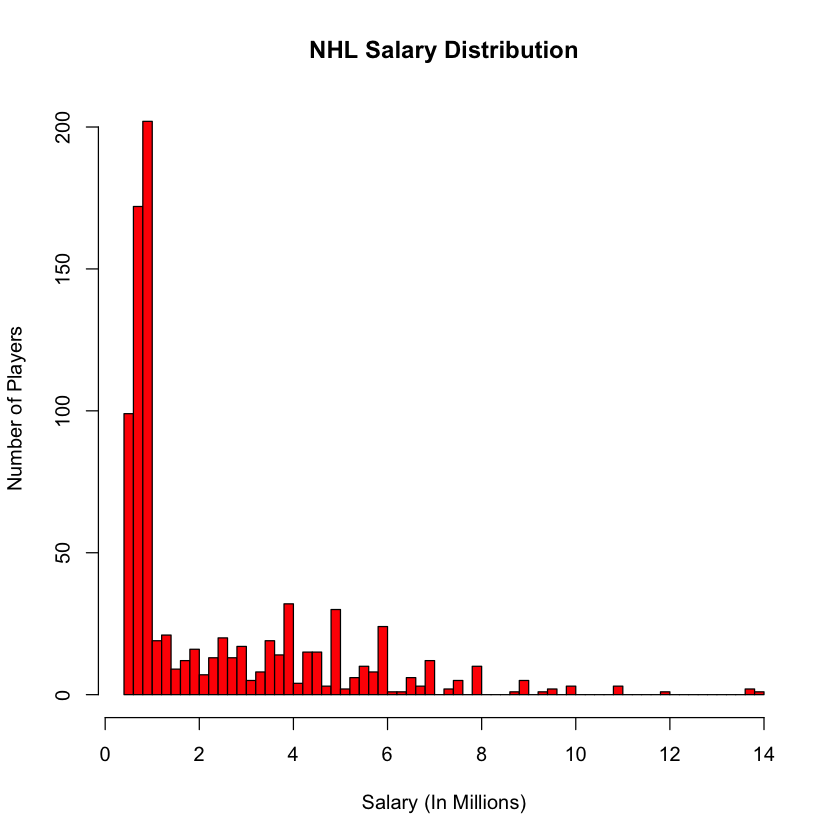

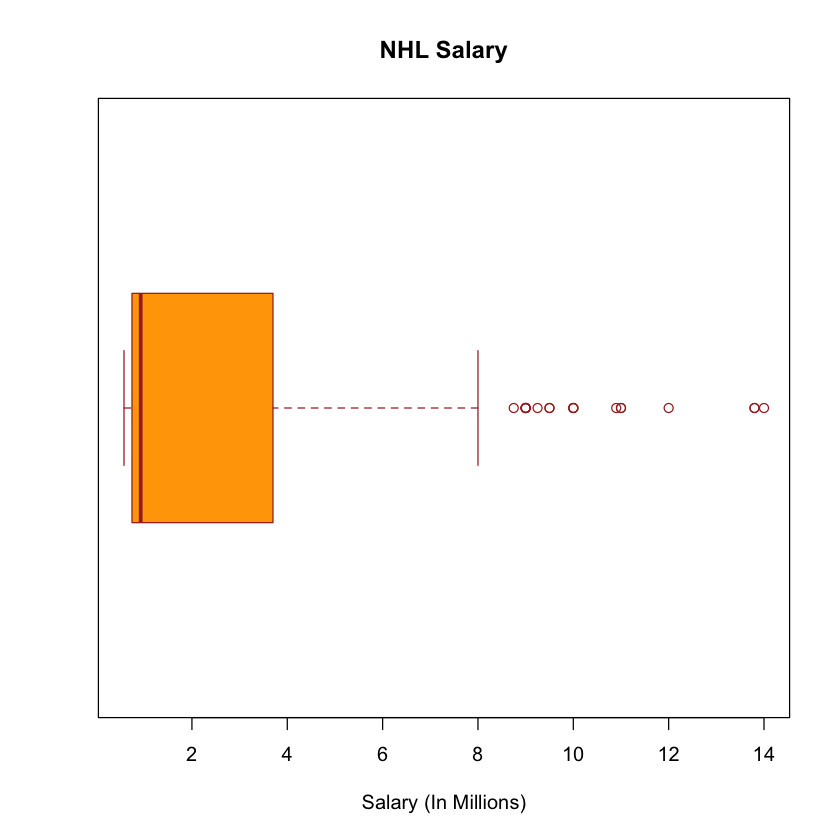

In [18]:
# Remove scientific notation for easier viewing
options(scipen = 999)

# Suppress warnings
options(warn=-1)

# Import library
library('RCurl')

# Link to data
link = getURL('https://raw.githubusercontent.com/bradklassen/Predicting_NHL_Salaries/master/NHL_Salaries.csv')

# Assign data to df
df_ELC = read.csv(text = link)

# Remove unnecessary 'X' column that is an extra index
df_ELC = df_ELC[!names(df_ELC) %in% c("X")]

# Print number of rows and columns
dim(df_ELC)

# Plot of NHL Salaries
hist(df_ELC$Salary/1000000, breaks = 50, col = 'red', main = 'NHL Salary Distribution', 
     xlab = 'Salary (In Millions)', ylab = 'Number of Players')

# Boxplot of Salaries and it's quantiles
summary(df_ELC$Salary)
boxplot(df_ELC$Salary/1000000, main = 'NHL Salary', xlab = 'Salary (In Millions)', 
        col = 'orange', border = 'brown', horizontal = TRUE)

The smallest salary of the players in the 2016-2017 NHL season is \\$575,000, the average salary is \\$2,325,289, and the largest salary is \\$14,000,000. During the given season, the league minimum salary was \\$575,000, meaning no team is allowed to pay a player less than the amount stated. The salary cap for each team during the given season was \\$73,000,000. Meaning this amount must cover all of the players salaries on the team. The maximum salary that a player may receive is 20\% of the team's salary cap. Using this information we are able to determine the range of the output variable. The minimum a player can earn in the given season is \\$575,000 and the maximum a player can earn is \\$14,600,000. 

<a id="4"></a> <br>
### Entry-Level Contracts

From the histogram above, we can see that the data is skewed right. This means that our model may give the most reliable predictions for lower salaries. To overcome this, we decided to remove players with entry-level contracts from the data set. Since entry-level contracts are fixed by the league and not negotiated by the player agents and general managers, this may affect our predictions and introduce a bias. We reviewed 2014, 2015, and 2016 NHL drafts to determine the age of the players at the time of the draft and any player whose contract extended into the 2016 season was removed. Some of the athletes we removed were players from age 18 to 21 with 3 year contracts, players age 22 to 23 with 2 years contracts, and players age 24 with 1 year contracts. Removing the entry-level contracts will improve the predictive power as well as the accuracy of the machine learning models. Unfortunately, many of the birth dates in the original data set were incorrect. According to the data, there were many occurrences where players were born in the year 2000 or later, yet were still drafted before the 2016 season. For example, in the data set it states that Connor McDavid was born on January 14, 2001. Yet Mcdavid was actually born on January 13, 1997. As a result, the entry-level contracts needed to be removed manually. We have removed entry-level contracts using excel and have created a new data set to be used for further analysis. The box plot and histogram below show the summary of the salary of the athletes with entry-level contracts removed.

Dimensions:  789 154

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  575000   725000  1100000  2483054  4000000 14000000 

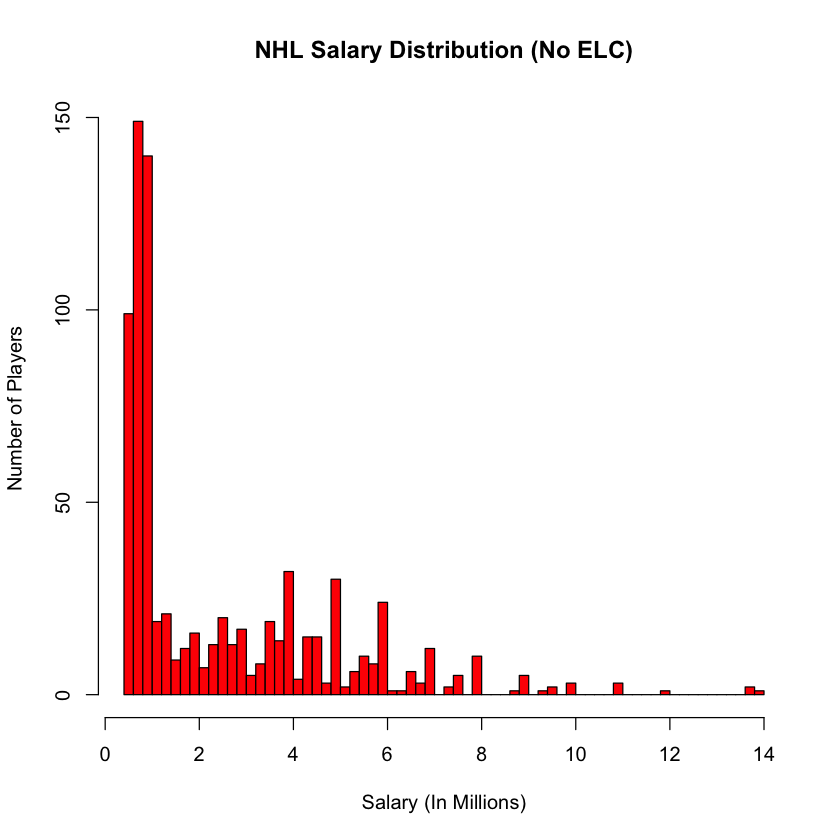

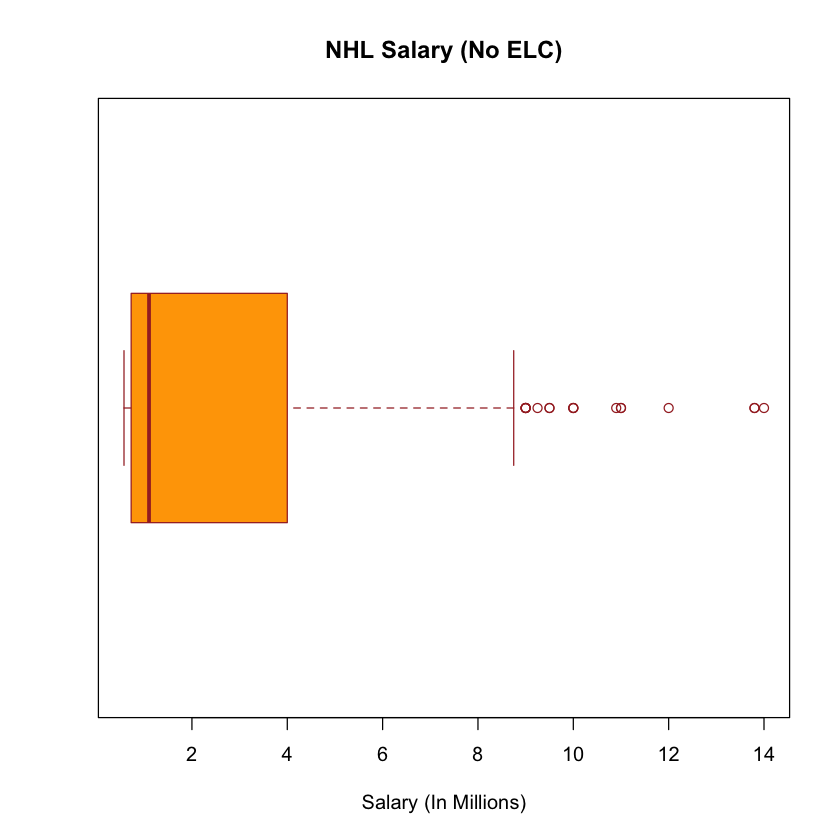

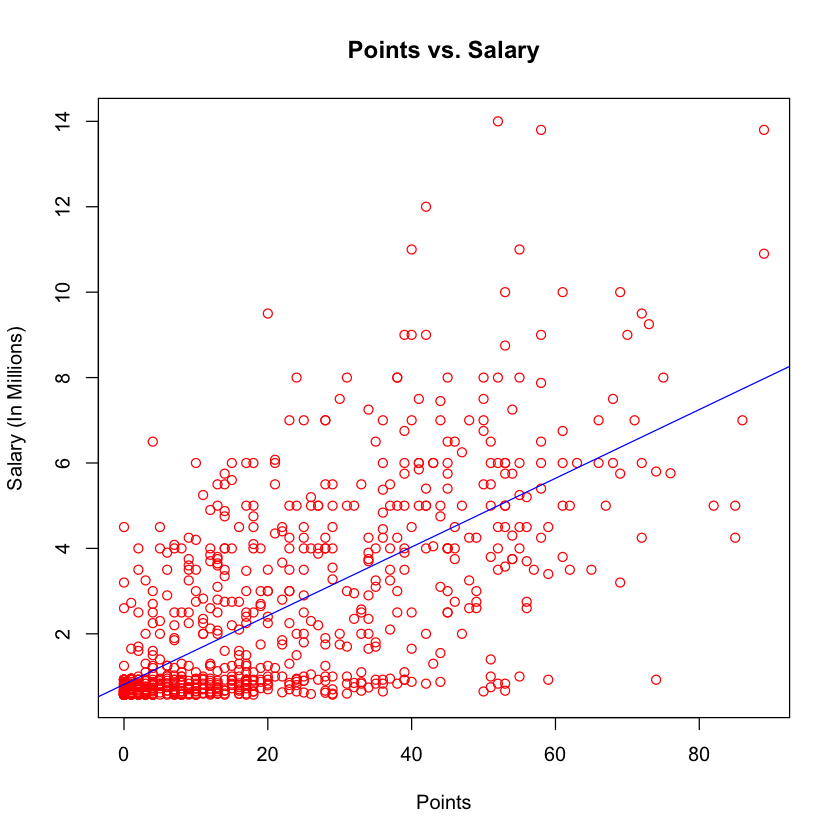

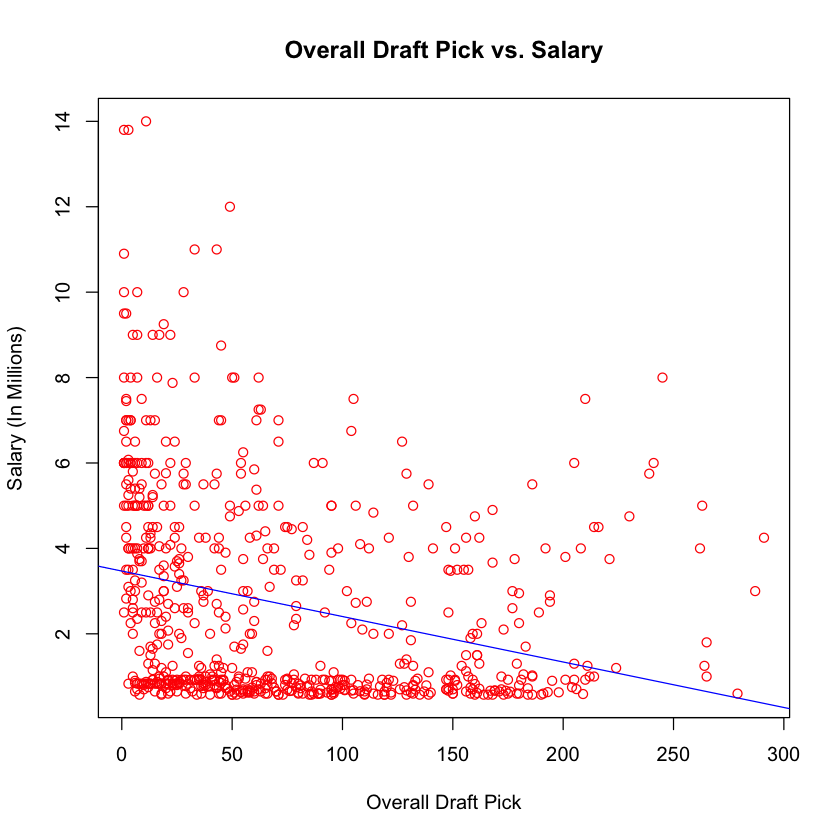

In [19]:
# Link to data without entry-level contracts
link = getURL('https://raw.githubusercontent.com/bradklassen/Predicting_NHL_Salaries/master/NHL_Salaries_ELC_Removed.csv')

# Assign data to df
df = read.csv(text = link)

# Remove columns where Salary is null
df = df[!is.na(df$Salary), ]

# Print number of rows and columns
cat('Dimensions: ', dim(df))

# Percentage of missing data per column
percent_missing = as.data.frame(colMeans(is.na(df)) * 100)

# Count of missing data per column
count_missing = as.data.frame(colSums(is.na(df)))

# Plot of NHL Salaries
hist(df$Salary/1000000, breaks = 50, col = 'red', main = 'NHL Salary Distribution (No ELC)', 
     xlab = 'Salary (In Millions)', ylab = 'Number of Players')

# Boxplot of Salaries and it's quantiles
summary(df$Salary)
boxplot(df$Salary/1000000, main = 'NHL Salary (No ELC)', xlab = 'Salary (In Millions)', 
        col = 'orange', border = 'brown', horizontal = TRUE)

### Points Vs. Salary ###

# Plot of Points vs. Salary
plot(df$PTS, df$Salary/1000000, main = 'Points vs. Salary', col = 'red', 
     xlab = 'Points', ylab = 'Salary (In Millions)')

# Fit line to scatterplot
abline(lm(Salary/1000000 ~ PTS, data = df), col = 'blue')

### Overall Draft Pick Vs. Salary ###

# Draft Pick Overall vs. Salary plot
plot(df$Ovrl, df$Salary/1000000, main = 'Overall Draft Pick vs. Salary', 
     col = 'red', xlab = 'Overall Draft Pick', ylab = 'Salary (In Millions)')

# Fit line to scatterplot
abline(lm(Salary/1000000 ~ Ovrl, data = df), col = "blue")

<a id="5"></a> <br>
### Correlation

The correlation plot below shows the correlation matrix for five selected inputs that were thought to be important as judged by hockey knowledge. (Goals (G), Assists (A), Points (PTS), Time on Ice (TOI) and Plus/Minus (+/-)). These statistics will be described in a table below.

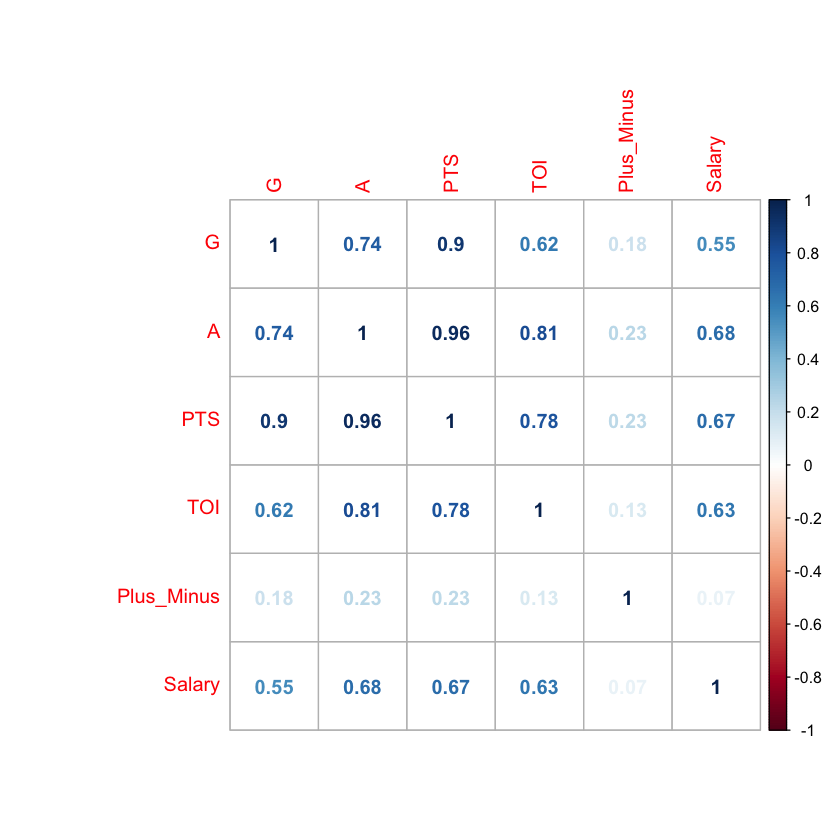

,G,A,PTS,TOI,Plus_Minus,Salary
G,1.0000000,0.7410388,0.9033727,0.6156632,0.18103682,0.55425170
A,0.7410388,1.0000000,0.9573900,0.8132904,0.23178780,0.67915688
PTS,0.9033727,0.9573900,1.0000000,0.7843293,0.22607609,0.67227527
TOI,0.6156632,0.8132904,0.7843293,1.0000000,0.13495865,0.63216539
Plus_Minus,0.1810368,0.2317878,0.2260761,0.1349587,1.00000000,0.07185587
Salary,0.5542517,0.6791569,0.6722753,0.6321654,0.07185587,1.00000000


,row,column,cor,p
,<fct>,<fct>,<dbl>,<dbl>
6556,Salary,xGF,0.6901787,0
7022,Salary,GF,0.6858858,0
6787,Salary,SCF,0.6839061,0
6329,Salary,SF,0.6824268,0
5887,Salary,CF,0.6809184,0


,row,column,cor,p
,<fct>,<fct>,<dbl>,<dbl>
254,Salary,SV.,-0.05490278,0.1235824473020175063
1082,Salary,iHDf,-0.07691349,0.0315097674069264588
7,Salary,DftRd,-0.26616668,0.0000000000031277203
11,Salary,Ovrl,-0.27746950,0.0000000000003341771
4,Salary,DftYr,-0.42243410,0.0000000000000000000


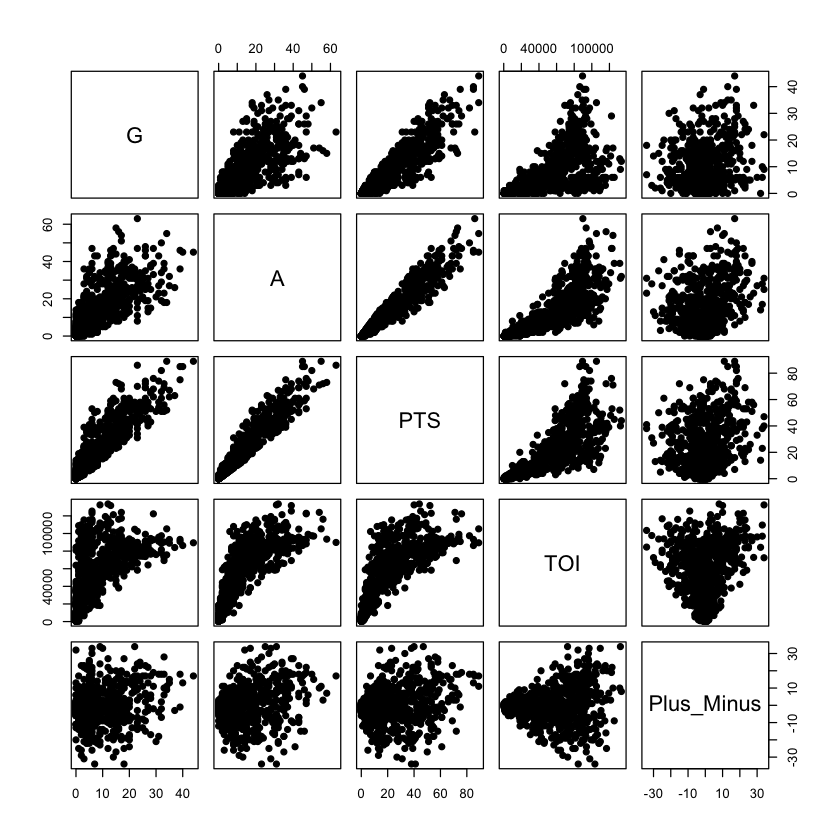

In [20]:
# Rename 'X...' column as 'Plus_Minus'
names(df)[names(df) == 'X...'] = 'Plus_Minus'

# Load necessary library
library(corrplot)
# Create a matrix of correlations
corr_data = cor(as.matrix(df[, c('G', 'A', 'PTS', 'TOI', 'Plus_Minus', 'Salary')]))
# Plot the correlation matrix 
corrplot(corr_data, method = 'number')
# Plot a scatterplot of the pairs of inputs
pairs(df[, c('G', 'A', 'PTS', 'TOI', 'Plus_Minus')], pch = 19)
# Print correlation data
corr_data

### Create data set with all numeric inputs and output ###

# Indices of numeric columns
inds = unlist(lapply(df, is.numeric))
# Create a new data set out of the numeric inputs only
numeric_df = df[, inds]

### Calculate the correlation between all numeric inputs and output ###

# Function to flatten the correlation matrix
# cormat: matrix of the correlation coefficients
# pmat: matrix of the correlation p-values
flattenCorrMatrix = function(cormat, pmat){
  ut = upper.tri(cormat)
  # Create a data frame of the columns, correlations, and p-value 
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor = (cormat)[ut],
    p = pmat[ut]
  )
}

# Load necessary library
library(Hmisc)
# Convert to matrix
res = rcorr(as.matrix(numeric_df))
# Matrix is so large that we will flatten it for easier viewing
flat_corr = flattenCorrMatrix(res$r, res$P)

# Data set containing the correlations of inputs with the output 'Salary'
Salary_df = flat_corr[which(flat_corr$row == 'Salary'),]

# Sort the correlations in descending order
Salary_sorted = Salary_df[order(-Salary_df$cor),]

# Print the 5 inputs with the largest positive correlation to the output "Salary"
head(Salary_sorted, n = 5)

# Print the 5 inputs with the largest negative correlation to the output "Salary"
tail(Salary_sorted, n = 5)

Below is a table of notable inputs and their correlation coefficients with respect to salary. Rows one to three are inputs with the largest positive correlation, rows four and five are inputs with the largest negative correlation, and rows six to nine are inputs that are chosen using hockey knowledge. Due to the large number of inputs in the data set, only a few important inputs have been described below.

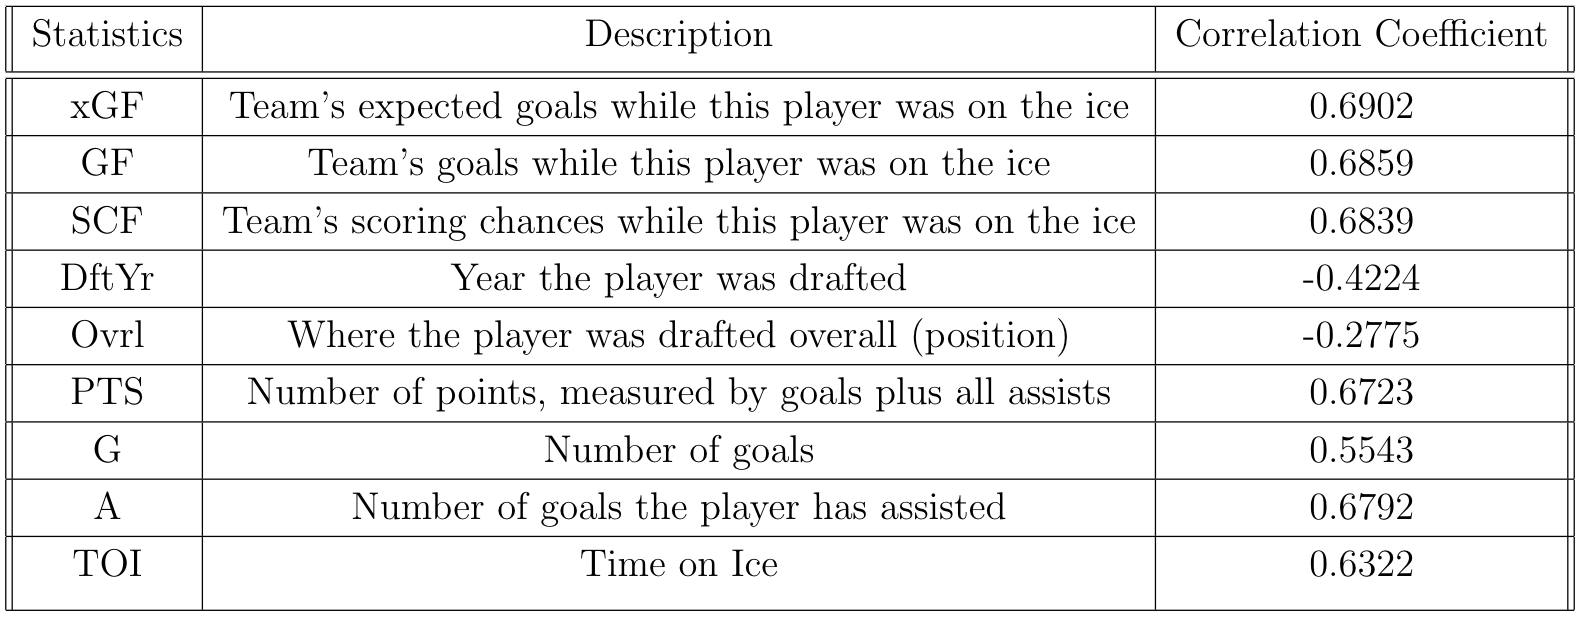

<a id="6"></a> <br>
### Missing Value Imputation

Many statistical learning models are incapable of handling data with missing values, thereforewe must impute new data. We have used a common method for imputing missing data by fillingthe missing value with the mean of the statistic.

In [21]:
# Load library for filling missing values
library(zoo)

# Fill missing values with mean of columns
numeric_df = na.aggregate(numeric_df)

<a id="7"></a> <br>
## Methods

Due to the output variable being continuous, this project explores regression methods including two linear models and three non-linear models. The linear models tested include LASSO regression (L1 loss function with absolute penalty term) and ridge regression (L2 loss function with quadratic penalty term). The non-linear models that are tested include decision trees (node impurity uses a L2 loss function), kernels (data driven approach with no loss function) and a bonus gradient boosting method known as XGBoost (L2 loss function). The project uses k-fold cross validation as the resampling technique that is used to estimate any hyperparameter and assess the machine learning models. The evaluation metric that is used to judge the performance of the regression models is root mean squared error (RMSE). RMSE was chosen over MSE due to the massive size of the model errors.

<a id="8"></a> <br>
### Ridge Regression

In our data set, there are 153 input variables. From correlation plots shown above, we noticed that these variables are highly correlated, as a result multicollinearity seems to exist in our data set. Multicollinearity makes coefficients highly sensitive to the small changes in the model, increases the variance of regression coefficients, and reduces the precision of the estimated coefficients which weakens the power of the statistical model. As a remedy, ridge regression can be used to add some degree of biasedness to the regression estimates for reducing the variance. [2] Lambda is a hyperparameter used in ridge regression that controls the amount of shrinkage. Lambda places a penalty on the beta coefficients and shrinks unimportant beta coefficients towards zero. Ridge regression adds a penalty that is equal to the square of the magnitude of the coefficients, shrinking them to small values but not eliminating them entirely. Prior to performing ridge regression, the data must be standardized because the regularization technique depends on the magnitude of each variable. Using k-fold cross validation with 10 folds, the program performs ridge regression for a sequence of lambda values.

<a id="9"></a> <br>
### LASSO Regression

In ridge regression, all the predictors are included in the final model. The penalty, lambda, shrinks coefficients towards zero but it does not set any of them exactly equal to zero. LASSO regression is an alternative to ridge regression that overcomes this disadvantage. LASSO regression adds a penalty to the absolute value of the magnitude of the coefficients. This penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when the tuning parameter lambda is sufficiently large. Hence, LASSO is capable of performing variable selection. LASSO yields sparse models that involve only a subset of variables.

<a id="10"></a> <br>
### Decision Tree Regression

Decision trees are significant predictors and embody an explicit representation of the structure in a data set. They explore the structure of the data while developing an easy to visualize decision rule for predicting outcome. Decision trees are constructed via an algorithmic approach that identifies a way to split a data set based on different conditions. We created a fully grown decision tree using the training data. The training data is in the root node which gets divided into the branches to define two new nodes. This process continues until the stopping criteria is met. Fully grown decision trees tend to overfit the model. Hence, we prune the tree by trimming its branches. We prune the tree to the nodes where the RMSE is the minimum. Pruning reduces the complexity of the model and improves the prediction accuracy.

<a id="11"></a> <br>
### XGBoost Regression

In addition to decision trees and kernel smoothing regression, Extreme Gradient Boost (XGBoost) is another non-linear technique explored in this project. The main idea of boosting is to combine a series of weak classifiers with low accuracy to build a strong classifier with better performance. XGBoost improves predictive performance and reduces the variance of the final model by using only a random subset of data to fit each new tree. [3]

<a id="12"></a> <br>
### Kernel Smoothing Regression (Additive Model)

Kernel smoothing regression is one of the non-linear techniques we used to further look into the structural features of the data. The basic principle is that local averaging or smoothing is performed with respect to a kernel function. Since kernel methods cannot be applied naively to higher dimensional data, we used an additive model of only the top five best inputs as judged by the XGBoost model. An additive model estimates five one-dimensional kernel regression functions. We used the epanechnikov kernel function because it has the highest efficiency relative to other common kernels. A constant bandwidth of 0.5 was estimated using the back fitting algorithm and 10-fold cross-validation. Bandwidth refers to the maximum distance from the kernel’s center at which mass is spread.

<a id="13"></a> <br>
## Results

Each model explored in the project had various hyperparameters that were tuned to allow for optimal performance. We have created the folds below for cross validation.

In [22]:
# Number of rows in data set
n = dim(numeric_df)[1]

# Number of folds for K-Fold cross validation
nFolds = 10

# Number of observations per fold
n_per_fold = floor(n / nFolds)

# Set seed for split
set.seed(0)

# Create empty list for appending the folds too
folds = list()

# Shuffle index for creating folds
shuffled_index = sample(c(1:n))

# Add data to each fold
for(fold in c(1:(nFolds - 1))){
  folds[[fold]] = shuffled_index[c((1 + (fold - 1) * n_per_fold):(fold * n_per_fold))]
}

# If n does not divide evenly then lump additional observations into final fold
folds[[nFolds]] = shuffled_index[c((1 + (nFolds - 1) * n_per_fold):n)]

<a id="14"></a> <br>
### Ridge Regression

The optimal ridge regression model had a lambda value of 489312 with a corresponding RMSE of 1468157. The plot below highlights how the lambda value affects the RMSE. The first section of the code below is used to find the optimal lambda value. The second part of the code is used to plot the lambda values and their corresponding RMSE.

Ridge Regression Optimal Lambda:  489312
Ridge Regression RMSE:  1468157

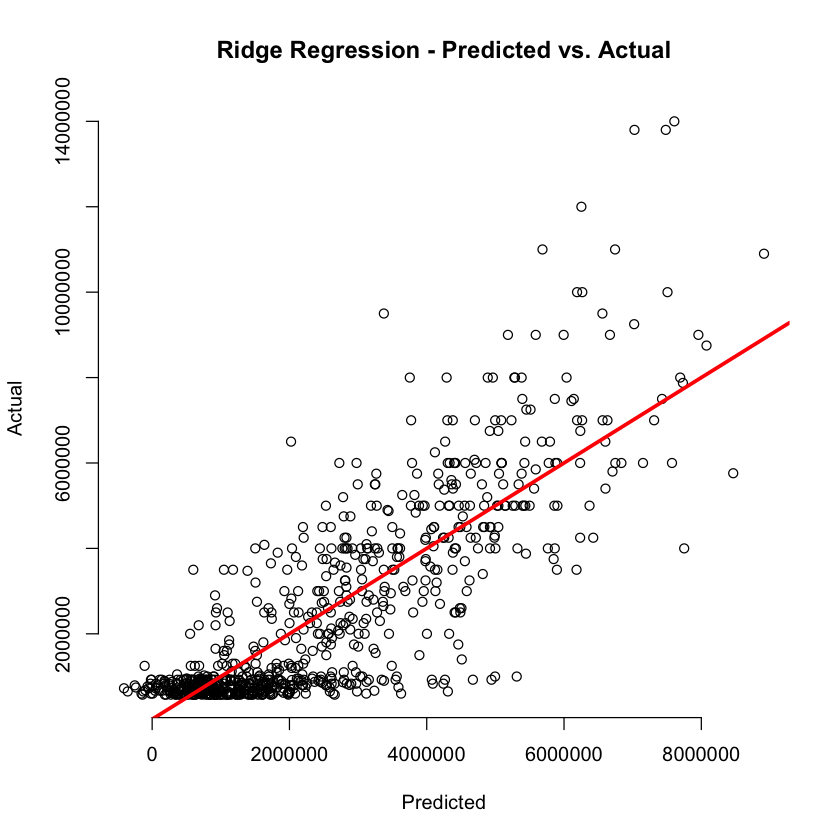

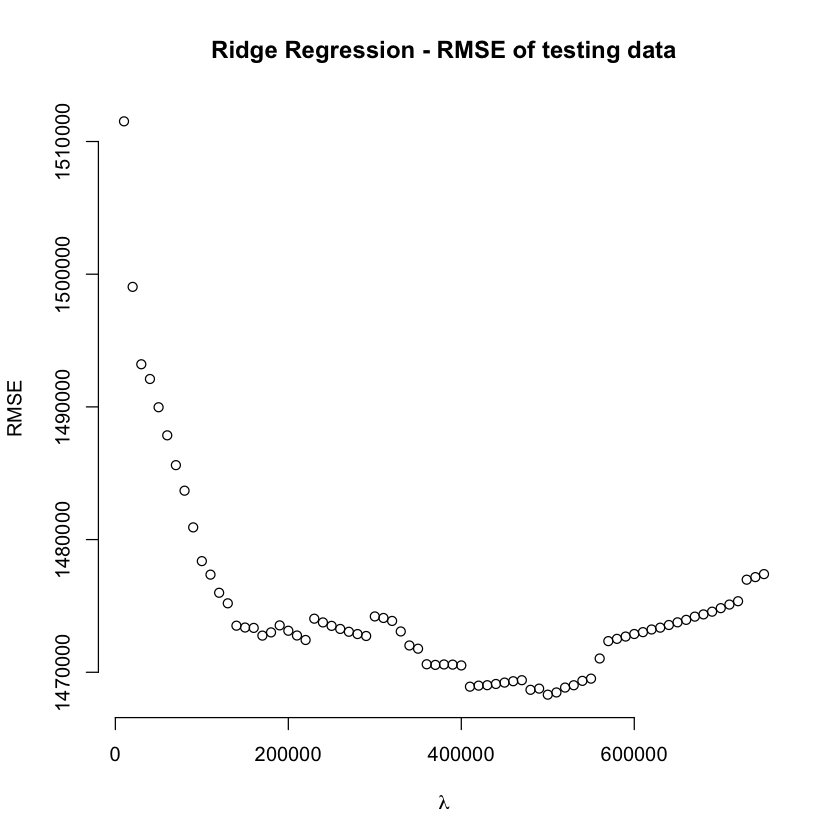

In [23]:
##########################
# Finding Optimal Lambda #
##########################

# Load necessary library
library(glmnet)

# Test sequence of lambda values 

# Due to computation time, various steps in the sequence have been explored

#lambda_values = seq(from = 10000, to = 750000, by = 10000) 
#lambda_values = seq(from = 500000-4*10000, to = 500000+4*10000, by = 1000) 
#lambda_values = seq(from = 492000-4*1000, to = 492000+4*1000, by = 100)
#lambda_values = seq(from = 489400-4*100, to = 489400+4*100, by = 10)
lambda_values = seq(from = 489320-4*10, to = 489320+4*10, by = 1)

# Number of lambda values to be tested
n_lambda_values = length(lambda_values)

# Initialize RMSE values for the ridge regression
Ridge_RMSE = matrix(0, nrow = n_lambda_values, ncol = nFolds)

# Iterate through folds
for(fold in c(1:nFolds)){
  
  # Create training & testing data sets
  training_data = numeric_df[-folds[[fold]],]
  testing_data = numeric_df[folds[[fold]],]
  
  # Number of observations in training and testing data sets
  n_training = dim(training_data)[1]
  n_testing = dim(testing_data)[1]
  
  # Create input matrix and output vector for training data
  trainingX = model.matrix(Salary ~ 0 + ., data = training_data)
  trainingY = matrix(training_data$Salary, nrow = n_training)
  
  # Create input matrix and output vector for testing data
  testingX = model.matrix(Salary ~ 0 + ., data = testing_data)
  testingY = matrix(testing_data$Salary, nrow = n_testing)
  
  # Number of inputs
  p = dim(trainingX)[2]
  
  # Standard deviation & mean of training X data set
  x_sd = apply(trainingX, 2, sd)
  x_mean = apply(trainingX, 2, mean)
  
  # Scaling training and testing inputs
  trainingX = t((t(trainingX) - x_mean) / x_sd)
  testingX = t((t(testingX) - x_mean) / x_sd)
  
  # Create testingX0 (with intercept) for predictions and RMSE computation 
  testingX0 = cbind(matrix(1, nrow = dim(testingX)[1]), testingX)
  
  # Perform ridge regression for a range of lambda values
  for(i in c(1:n_lambda_values)){ 
    # Set lambda to the ith element in lambda values
    lambda = lambda_values[i]
    # Fit the ridge regression model
    fit = glmnet(trainingX, trainingY - mean(trainingY), alpha = 0, 
                 lambda = lambda, intercept = FALSE)
    # Create Beta hat 
    BHat = matrix(coef(fit), nrow = (p + 1))
    # Set first element of beta hat equal to the mean of training Y data set
    BHat[1] = mean(trainingY)
    # Create prediction
    testingYhat = testingX0 %*% BHat
    # Compute RMSE value and append to the Ridge_RMSE matrix
    Ridge_RMSE[i, fold] = sqrt(sum((testingYhat - testingY)^2) / n_testing)
  }
}

# Find mean of RMSE values in rows
Ridge_RMSE = apply(Ridge_RMSE, 1, mean)

# Minimum RMSE value
Ridge_min_rmse = min(Ridge_RMSE)
# Lambda value that gives minimum RMSE value
Ridge_min_lambda = lambda_values[which.min(Ridge_RMSE)]
# Print minimum lambda value and RMSE
cat('Ridge Regression Optimal Lambda: ', Ridge_min_lambda)
cat('\nRidge Regression RMSE: ', Ridge_min_rmse)

# Refit model with minimum lambda
X = model.matrix(Salary ~ 0 + ., data = numeric_df)
Y = matrix(numeric_df$Salary, nrow = n)

# Number of inputs
p = dim(X)[2]

# Scaling training and testing inputs
X = t((t(X) - x_mean) / x_sd)

# Create testingX0 (with intercept) for predictions and RMSE computation 
X0 = cbind(matrix(1, nrow = dim(X)[1]), X)

# Fit the ridge regression model
fit_full_RIDGE = glmnet(X, Y - mean(Y), alpha = 0, lambda = Ridge_min_lambda, intercept = FALSE)
# Create Beta hat 
BHat_full_RIDGE = matrix(coef(fit_full_RIDGE), nrow = (p + 1))
# Set first element of beta hat equal to the mean of training Y data set
BHat_full_RIDGE[1] = mean(Y)
# Create prediction
Yhat = X0 %*% BHat_full_RIDGE
# Plot predicted vs actual
plot(Yhat, numeric_df$Salary, xlab = 'Predicted', ylab = 'Actual',
     main = 'Ridge Regression - Predicted vs. Actual', bty = 'n')
# Fit line to plot
abline(a = 0, b = 1, lwd = 3, col = 'red')

################
# For Plotting #
################

# Test sequence of lambda values 
lambda_values = seq(from = 10000, to = 750000, by = 10000) 
# Number of lambda values to be tested
n_lambda_values = length(lambda_values)

# Initialize RMSE values for the ridge regression
RMSE = matrix(0, nrow = n_lambda_values, ncol = nFolds)

# Iterate through folds
for(fold in c(1:nFolds)){
  
  # Create training & testing data sets
  training_data = numeric_df[-folds[[fold]],]
  testing_data = numeric_df[folds[[fold]],]
  
  # Number of observations in training and testing data sets
  n_training = dim(training_data)[1]
  n_testing = dim(testing_data)[1]
  
  # Create input matrix and output vector for training data
  trainingX = model.matrix(Salary ~ 0 + ., data = training_data)
  trainingY = matrix(training_data$Salary, nrow = n_training)
  
  # Create input matrix and output vector for testing data
  testingX = model.matrix(Salary ~ 0 + ., data = testing_data)
  testingY = matrix(testing_data$Salary, nrow = n_testing)
  
  # Number of inputs
  p = dim(trainingX)[2]
  
  # Standard deviation & mean of training X data set
  x_sd = apply(trainingX, 2, sd)
  x_mean = apply(trainingX, 2, mean)
  
  # Scaling training and testing inputs
  trainingX = t((t(trainingX) - x_mean) / x_sd)
  testingX = t((t(testingX) - x_mean) / x_sd)
  
  # Create testingX0 (with intercept) for predictions and RMSE computation 
  testingX0 = cbind(matrix(1, nrow = dim(testingX)[1]), testingX)
  
  # Perform ridge regression for a range of lambda values
  for(i in c(1:n_lambda_values)){ 
    # Set lambda to the ith element in lambda values
    lambda = lambda_values[i]
    # Fit the ridge regression model
    fit = glmnet(trainingX, trainingY - mean(trainingY), alpha = 0, 
                 lambda = lambda, intercept = FALSE)
    # Create Beta hat 
    BHat = matrix(coef(fit), nrow = (p + 1))
    # Set first element of beta hat equal to the mean of training Y data set
    BHat[1] = mean(trainingY)
    # Create prediction
    testingYhat = testingX0 %*% BHat
    # Compute RMSE value and append to the RMSE matrix
    RMSE[i, fold] = sqrt(sum((testingYhat - testingY)^2) / n_testing)
  }
}

# Find mean of RMSE values in rows
RMSE = apply(RMSE, 1, mean)

# Plot RMSE values as a function of lambda
plot(lambda_values, RMSE, xlab = expression(lambda), ylab = 'RMSE', 
     main = 'Ridge Regression - RMSE of testing data', bty = 'n')

<a id="15"></a> <br>
### LASSO Regression

The optimal LASSO regression model had a lambda value of 28392 with a corresponding RMSE of 1447595. The plot below highlights how the lambda value affects the RMSE. The first section of the code below is used to find the optimal lambda value. The second part of the code is used to plot the lambda values and their corresponding RMSE.

LASSO Regression Optimal Lambda:  28392
LASSO Regression RMSE:  1447595

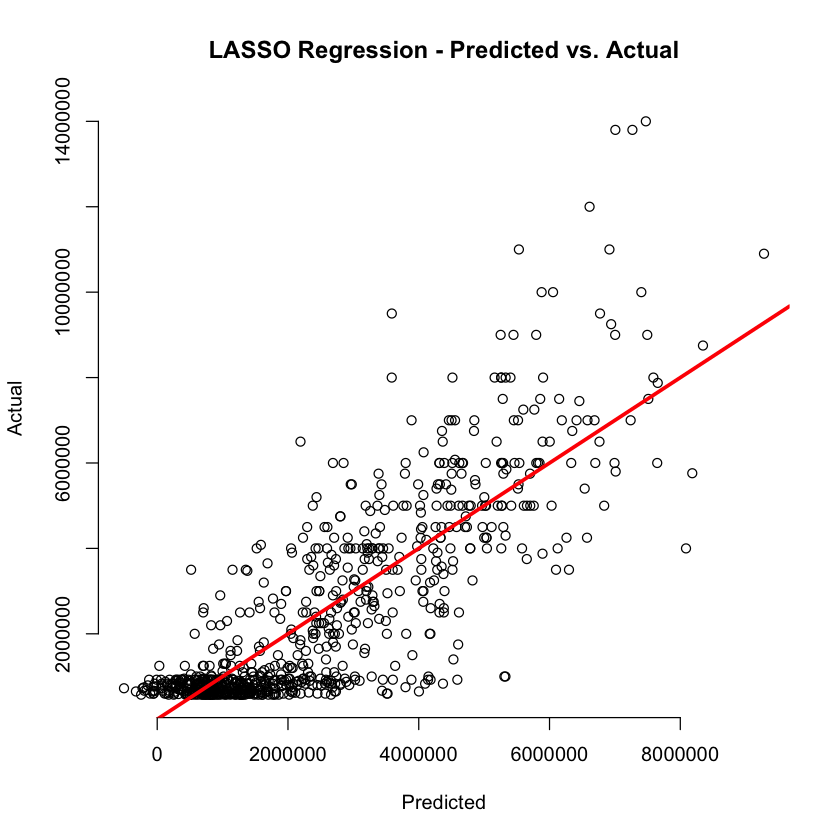

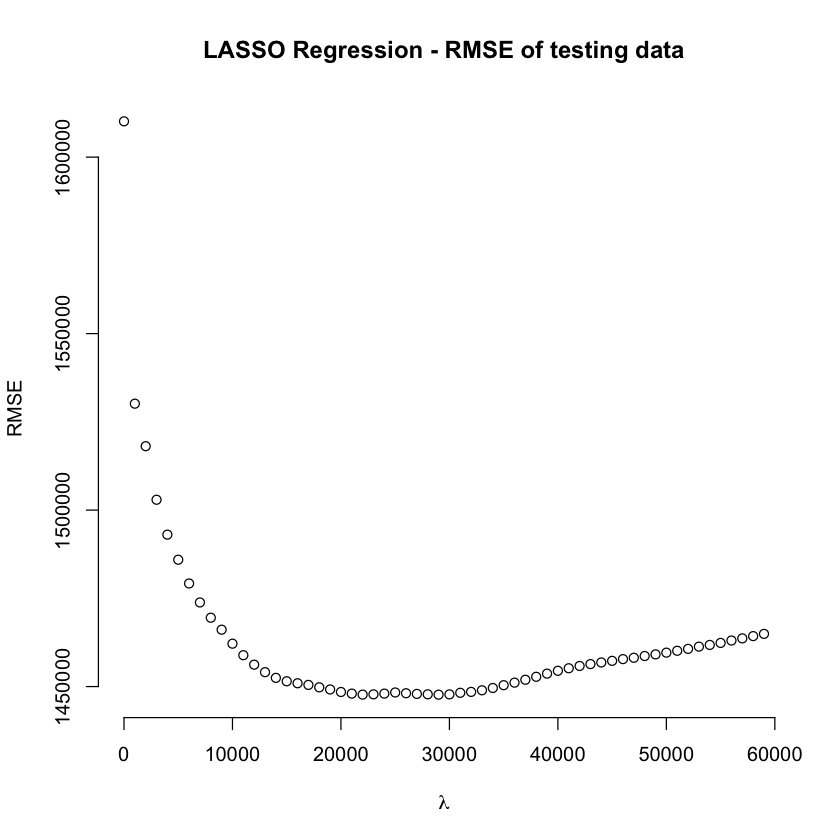

In [24]:
##########################
# Finding Optimal Lambda #
##########################

# Test sequence of lambda values 

# Due to computation time, various steps in the sequence have been explored

#lambda_values = seq(from = 1, to = 60000, by = 1000) 
#lambda_values = seq(from = 29001-4*1000, to = 29001+4*1000, by = 100)
#lambda_values = seq(from = 28601-4*100, to = 28601+4*100, by = 10)
lambda_values = seq(from = 28391-4*10, to = 28391+4*10, by = 1)

# Number of lambda values to be tested
n_lambda_values = length(lambda_values)

# Initialize RMSE values for the LASSO regression
RMSE = matrix(0, nrow = n_lambda_values, ncol = nFolds)

# Iterate through folds
for(fold in c(1:nFolds)){
  
  # Create training & testing data sets
  training_data = numeric_df[-folds[[fold]],]
  testing_data = numeric_df[folds[[fold]],]
  
  # Number of observations in training and testing data sets
  n_training = dim(training_data)[1]
  n_testing = dim(testing_data)[1]
  
  # Create input matrix and output vector for training data
  trainingX = model.matrix(Salary ~ 0 + ., data = training_data)
  trainingY = matrix(training_data$Salary, nrow = n_training)
  
  # Create input matrix and output vector for testing data
  testingX = model.matrix(Salary ~ 0 + ., data = testing_data)
  testingY = matrix(testing_data$Salary, nrow = n_testing)
  
  # Number of inputs
  p = dim(trainingX)[2]
  
  # Standard deviation & mean of training X data set
  x_sd = apply(trainingX, 2, sd)
  x_mean = apply(trainingX, 2, mean)
  
  # Scaling training and testing inputs
  trainingX = t((t(trainingX) - x_mean) / x_sd)
  testingX = t((t(testingX) - x_mean) / x_sd)
  
  # Create testingX0 (with intercept) for predictions and RMSE computation 
  testingX0 = cbind(matrix(1, nrow = dim(testingX)[1]), testingX)
  
  # Perform LASSO regression for a range of lambda values
  for(i in c(1:n_lambda_values)){ 
    # Set lambda to the ith element in lambda values
    lambda = lambda_values[i]
    # Fit the LASSO regression model
    fit = glmnet(trainingX, trainingY - mean(trainingY), alpha = 1, 
                 lambda = lambda, intercept = FALSE)
    # Create Beta hat 
    BHat = matrix(coef(fit), nrow = (p + 1))
    # Set first element of beta hat equal to the mean of training Y data set
    BHat[1] = mean(trainingY)
    # Create prediction
    testingYhat = testingX0 %*% BHat
    # Compute RMSE value and append to the RMSE matrix
    RMSE[i, fold] = sqrt(sum((testingYhat - testingY)^2) / n_testing)
  }
}

# Find mean of RMSE values in rows
RMSE = apply(RMSE, 1, mean)

# Minimum RMSE value
LASSO_min_rmse = min(RMSE)
# Lambda value that gives minimum RMSE value
LASSO_min_lambda = lambda_values[which.min(RMSE)]
# Print minimum lambda value and RMSE
cat('LASSO Regression Optimal Lambda: ', LASSO_min_lambda)
cat('\nLASSO Regression RMSE: ', LASSO_min_rmse)

# Refit model with minimum lambda
# Create input matrix and output vector for training data
X = model.matrix(Salary ~ 0 + ., data = numeric_df)
Y = matrix(numeric_df$Salary, nrow = n)

# Number of inputs
p = dim(X)[2]

# Scaling training and testing inputs
X = t((t(X) - x_mean) / x_sd)

# Create testingX0 (with intercept) for predictions and RMSE computation 
X0 = cbind(matrix(1, nrow = dim(X)[1]), X)

# Fit the LASSO regression model
fit_full_LASSO = glmnet(X, Y - mean(Y), alpha = 1, lambda = LASSO_min_lambda, intercept = FALSE)
# Create Beta hat 
BHat_full_LASSO = matrix(coef(fit_full_LASSO), nrow = (p + 1))
# Set first element of beta hat equal to the mean of training Y data set
BHat_full_LASSO[1] = mean(Y)
# Create prediction
Yhat = X0 %*% BHat_full_LASSO

# Plot predicted vs actual
plot(Yhat, numeric_df$Salary, xlab = 'Predicted', ylab = 'Actual',
     main = 'LASSO Regression - Predicted vs. Actual', bty = 'n')
# Fit line to plot
abline(a = 0, b = 1, lwd = 3, col = 'red')

################
# For Plotting #
################

# Test sequence of lambda values 
lambda_values = seq(from = 1, to = 60000, by = 1000) 

# Number of lambda values to be tested
n_lambda_values = length(lambda_values)

# Initialize RMSE values for the LASSO regression
RMSE = matrix(0, nrow = n_lambda_values, ncol = nFolds)

# Iterate through folds
for(fold in c(1:nFolds)){
  
  # Create training & testing data sets
  training_data = numeric_df[-folds[[fold]],]
  testing_data = numeric_df[folds[[fold]],]
  
  # Number of observations in training and testing data sets
  n_training = dim(training_data)[1]
  n_testing = dim(testing_data)[1]
  
  # Create input matrix and output vector for training data
  trainingX = model.matrix(Salary ~ 0 + ., data = training_data)
  trainingY = matrix(training_data$Salary, nrow = n_training)
  
  # Create input matrix and output vector for testing data
  testingX = model.matrix(Salary ~ 0 + ., data = testing_data)
  testingY = matrix(testing_data$Salary, nrow = n_testing)
  
  # Number of inputs
  p = dim(trainingX)[2]
  
  # Standard deviation & mean of training X data set
  x_sd = apply(trainingX, 2, sd)
  x_mean = apply(trainingX, 2, mean)
  
  # Scaling training and testing inputs
  trainingX = t((t(trainingX) - x_mean) / x_sd)
  testingX = t((t(testingX) - x_mean) / x_sd)
  
  # Create testingX0 (with intercept) for predictions and RMSE computation 
  testingX0 = cbind(matrix(1, nrow = dim(testingX)[1]), testingX)
  
  # Perform LASSO regression for a range of lambda values
  for(i in c(1:n_lambda_values)){ 
    # Set lambda to the ith element in lambda values
    lambda = lambda_values[i]
    # Fit the LASSO regression model
    fit = glmnet(trainingX, trainingY - mean(trainingY), alpha = 1, 
                 lambda = lambda, intercept = FALSE)
    # Create Beta hat 
    BHat = matrix(coef(fit), nrow = (p + 1))
    # Set first element of beta hat equal to the mean of training Y data set
    BHat[1] = mean(trainingY)
    # Create prediction
    testingYhat = testingX0 %*% BHat
    # Compute RMSE value and append to the RMSE matrix
    RMSE[i, fold] = sqrt(sum((testingYhat - testingY)^2) / n_testing)
  }
}

# Find mean of RMSE values in rows
RMSE = apply(RMSE, 1, mean)

# Plot RMSE values as a function of lambda
plot(lambda_values, RMSE, xlab = expression(lambda), ylab = 'RMSE', 
     main = 'LASSO Regression - RMSE of testing data', bty = 'n')

<a id="16"></a> <br>
### Decision Tree Regression

The optimal decision tree regression model had a complexity parameter of 0.01908 with a corresponding RMSE of 1463413. The plot below highlights the tree-like structure of the model and the inputs that were used to create the tree. Shown below is a  pruned decision tree with the optimal complexity parameter. The table below consists of the variables that were used to build the pruned decision tree.

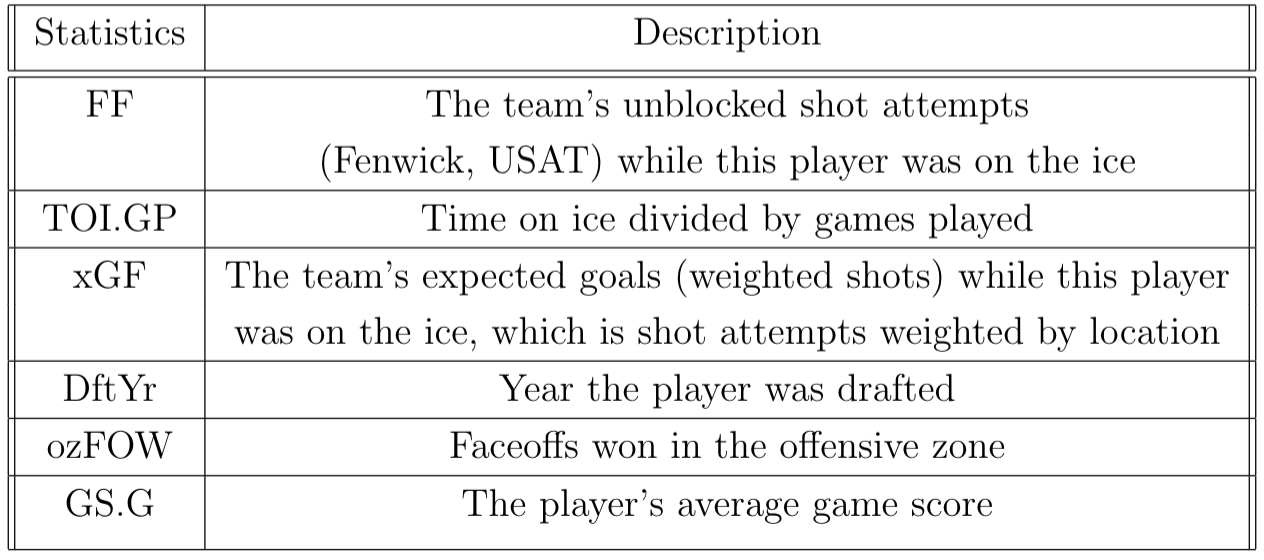

Complexity Parameter:  0.01907672
Decision Tree RMSE:  1463413

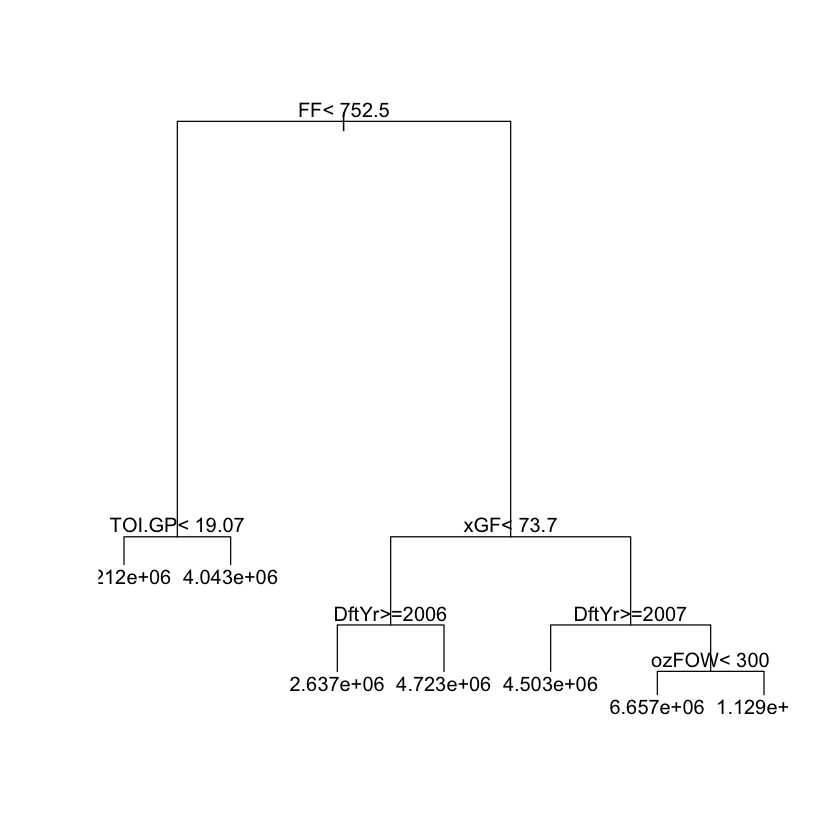

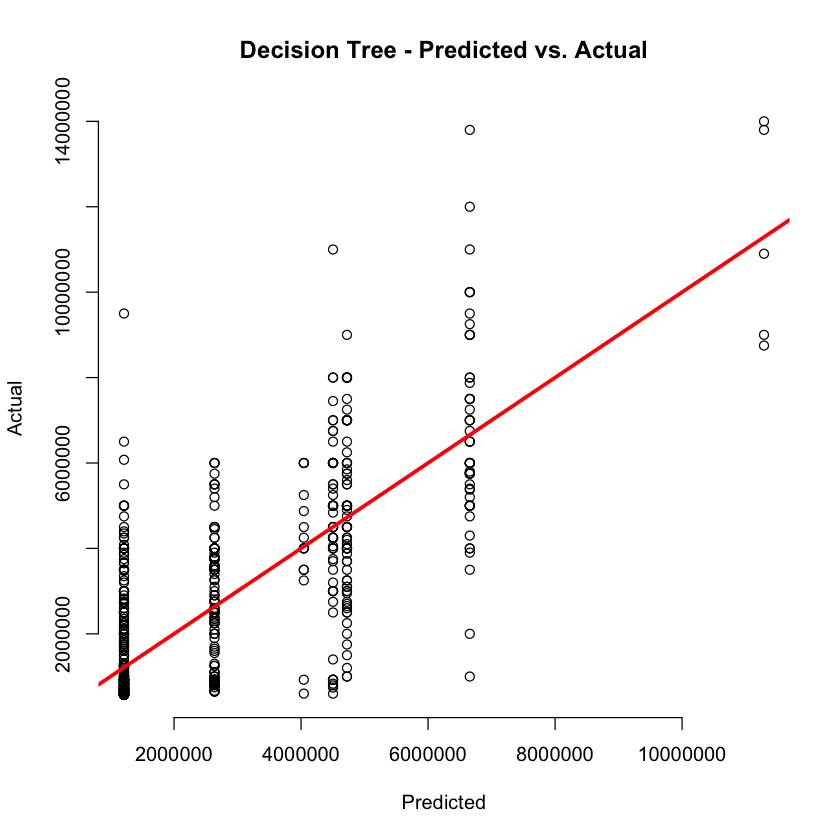

In [25]:
# Load required library
library(rpart)

# Build the entire tree
fit = rpart(Salary ~ ., data = numeric_df, method = 'anova', 
            control = rpart.control(cp = 0, minsplit = 1, minbucket = 1, xval = 10))

# Get complexity parameter
cp = fit$cp[which.min(matrix(fit$cp[,4])), 1]
cat('Complexity Parameter: ', cp)

# Prune the tree using complexity parameter
pruned_fit = prune.rpart(fit, cp)

# Make predictions
yHat = predict(pruned_fit, numeric_df)

# Compute RMSE value and append to the RMSE matrix
DT_RMSE = sqrt(sum((yHat - numeric_df$Salary)^2) / n)

# Plot the pruned tree with the input names and splitting values
plot(pruned_fit)
text(pruned_fit)

# Print RMSE value
cat('\nDecision Tree RMSE: ', DT_RMSE)

# Plot predicted vs actual and fit line to plot
plot(yHat, numeric_df$Salary, xlab = 'Predicted', ylab = 'Actual', 
     main = 'Decision Tree - Predicted vs. Actual', bty = 'n')
abline(a = 0, b = 1, lwd = 3, col = 'red')

<a id="17"></a> <br>
### XGBoost Regression

The XGBoost model resulted in an RMSE of 1512315. The bar chart below shows the most important features in the XGBoost model as measured by gain. Gain is the average training loss reduction gained when using a feature for splitting. The top five variables obtained from XGBoost to predict the salaries of the NHL players are similar to the variables from the decision tree model, with the addition of the third most important feature, CF. CF is the team's shot attempts (Corsi, SAT) while this player was on the ice.

[20:12:08] WARNING: amalgamation/../src/learner.cc:480: 
Parameters: { metrics } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:12:11] WARNING: amalgamation/../src/learner.cc:480: 
Parameters: { metrics } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:12:13] WARNING: amalgamation/../src/learner.cc:480: 
Parameters: { metrics } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you 

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
FF,0.34329652,0.001770210,0.0011769321
DftYr,0.10318500,0.016087414,0.0535111809
CF,0.08185784,0.002650131,0.0028246371
xGF,0.07057761,0.006119355,0.0032954100
TOI.GP,0.03708454,0.007619299,0.0133385641
GF,0.03243937,0.002492533,0.0023538643
TOI.GP.1,0.02262358,0.004764568,0.0017261671
GS.G,0.02184039,0.009432365,0.0076108278
Ovrl,0.01828416,0.084645899,0.0309925461


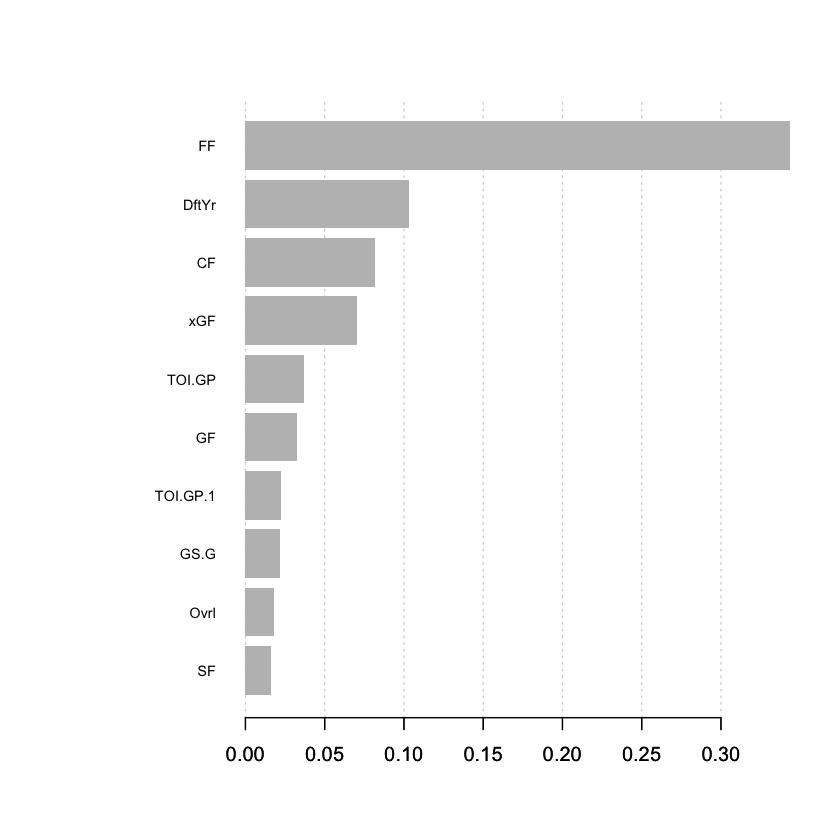

In [26]:
# Load required library
require(xgboost)

# Initialize RMSE values for the XGBoost regression
XGBoost_RMSE = matrix(0, nrow = nFolds)

# Iterate through folds
for(fold in c(1:nFolds)){
  
  # Create training & testing data sets
  training_data = numeric_df[-folds[[fold]],]
  testing_data = numeric_df[folds[[fold]],]
  
  # Number of observations in training and testing data sets
  n_training = dim(training_data)[1]
  n_testing = dim(testing_data)[1]
  
  # Create input matrix and output vector for training data
  trainingX = model.matrix(Salary ~ 0 + ., data = training_data)
  trainingY = matrix(training_data$Salary, nrow = n_training)
  
  # Create input matrix and output vector for testing data
  testingX = model.matrix(Salary ~ 0 + ., data = testing_data)
  testingY = matrix(testing_data$Salary, nrow = n_testing)
  
  # Number of inputs
  p = dim(trainingX)[2]
  
  # Standard deviation & mean of training X data set
  x_sd = apply(trainingX, 2, sd)
  x_mean = apply(trainingX, 2, mean)
  
  # Scaling training and testing inputs
  trainingX = t((t(trainingX) - x_mean) / x_sd)
  testingX = t((t(testingX) - x_mean) / x_sd)
  
  # Create testingX0 (with intercept) for predictions and RMSE computation 
  testingX0 = cbind(matrix(1, nrow = dim(testingX)[1]), testingX)
  
  # Fit XGBoost model with 10 fold cross validation, using RMSE as performance metric
  xgb_reg = xgboost(data = trainingX, label = trainingY, nrounds = 1000, 
                    nthread = 2, max_depth = 8, eta = 0.3, metrics = 'rmse', 
                    objective = 'reg:squarederror', early_stopping_rounds = 50, 
                    verbose = 0)
  
  # Make predictions
  yHat = predict(xgb_reg, testingX)
  
  # Compute RMSE value and append to the RMSE matrix
  XGBoost_RMSE[fold] = sqrt(sum((yHat - testingY)^2) / n_testing)
  
}

# Find mean of RMSE values
XGBoost_RMSE = apply(XGBoost_RMSE, 2, mean)

# Print RMSE value
cat('XGBoost Regression RMSE: ', XGBoost_RMSE)

# Check feature importance

# 10 most important features in XGBoost Regression model
importance_matrix = xgb.importance(model = xgb_reg)[1:10]

# Print the most important features
head(importance_matrix, n = 10)

# Plot the importance measured by gain
xgb.plot.importance(importance_matrix = importance_matrix)

<a id="18"></a> <br>
### Kernel Smoothing Regression (Additive Model)

Kernel smoothing regression is quite computationally expensive, so we wanted to limit the number of models being created and were selective on the number of lambda values tested in the model. The plot below shows the RMSE for a narrow range of lambda values after determining the region where the minimum occurs. The lambda value of 0.5 led to the optimal RMSE of 1510169. This was obtained using the back fitting algorithm for the additive model.

Disclaimer: The kernel smoothing additive model below is quite computationaly expensive and may take a couple of hours to run. If you would like to speed up the run time, change the amount of folds in k-fold cross validation.

Kernel Smoothing Regression RMSE:  1510169
Kernel Smoothing Regression Lambda:  0.5

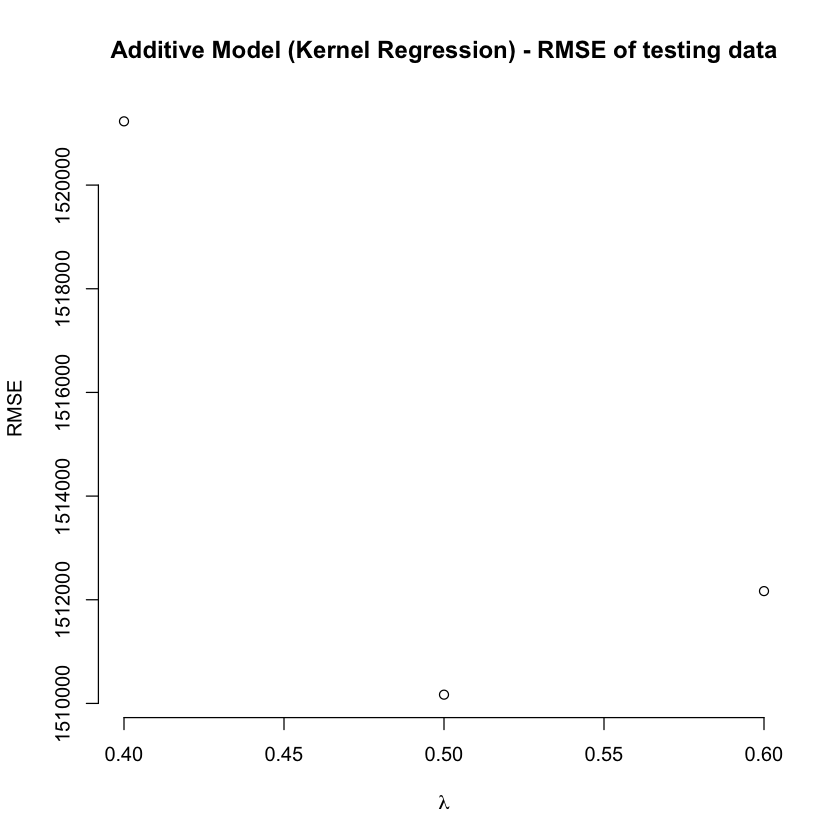

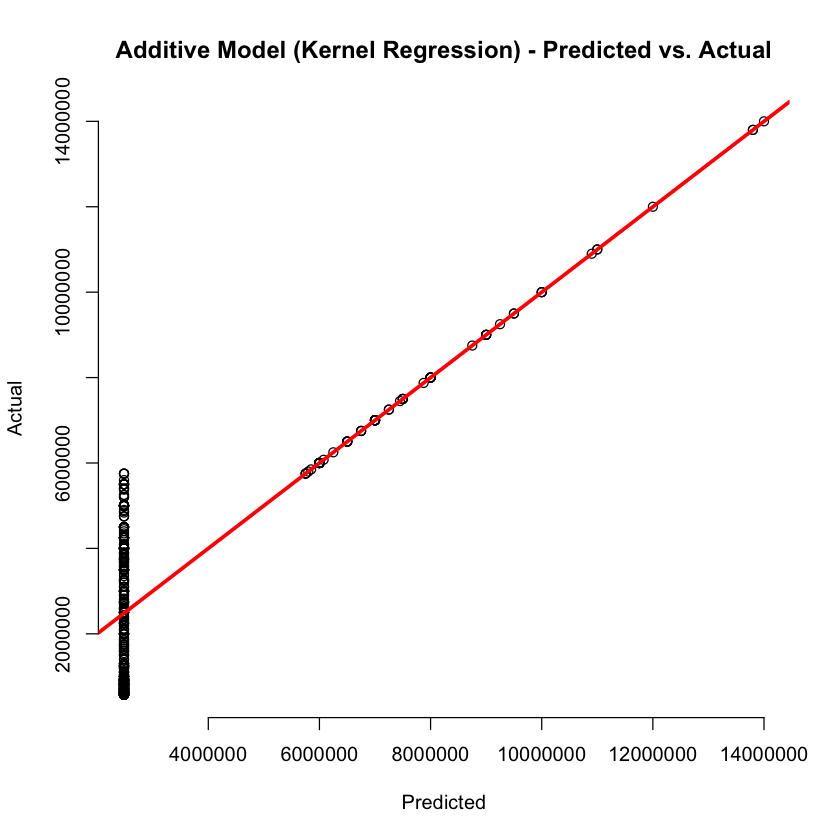

In [27]:
# Take 5 best inputs from XGboost
kernel_df = numeric_df[,c("Salary", "FF", "DftYr", "CF", "xGF", "TOI.GP")]

# Number of rows in data set
n = dim(kernel_df)[1]

# Use epanechnikov kernel (highest relative efficency)
epanechnikov_kernel = function(t){
  return(as.integer(abs(t) <= 1) * (3/4) * (1 - t^2))
}

# 1-D Kernel smoothing function (since using additive model)
kernel_smoothing = function(x0, X, Y, K, bandwidth){
  # Inputs
  #   x0 - input to be predicted
  #   X - matrix of training inputs (n x p)
  #   Y - matrix of training outputs (n x 1)
  #   k - kernel function (function)
  #   bandwidth  - kernel bandwidth (numeric)
  #
  # Outputs
  #   predicted y0 value   
  w = K(abs(x0 - X)/bandwidth)
  if(sum(w) == 0){w = 1}
  return(sum(w*Y) / sum(w))
}

# Test sequence of lambda values 
# Due to computation time, the step has been set to 0.1 but can be lowered for finer results
lambda_values = seq(from = 0.4, to = 0.6, by = 0.1)
# Number of lambda values to be tested
n_lambda_values = length(lambda_values)

# max iterations and tolerance value for the back fitting algorithm
max_iterations = 1000
epsilon = 0.5

# Initialize MSE values for the Kernel regression
Kernel_MSE = matrix(0, nrow = n_lambda_values, ncol = nFolds)

# Iterate through folds
for(fold in c(1:nFolds)){
  
  # Create training & testing data sets
  training_data = kernel_df[-folds[[fold]],]
  testing_data = kernel_df[folds[[fold]],]
  
  # Number of observations in training and testing data sets
  n_training = dim(training_data)[1]
  n_testing = dim(testing_data)[1]
  
  # Number of inputs
  p = dim(training_data)[2] - 1
  
  # Create input matrix and output vector for training data
  trainingX = model.matrix(Salary ~ 0 + ., data=training_data)
  trainingY = training_data$Salary
  
  # Create input matrix and output vector for testing data
  testingX = model.matrix(Salary ~ 0 + ., data=testing_data)
  testingY = testing_data$Salary
  
  # Standardize input variables
  x_mean = apply(trainingX, 2, mean)
  x_sd = apply(trainingX, 2, sd)
  
  # Scale training X and testing X data sets
  trainingX = t((t(trainingX) - x_mean) / x_sd)
  testingX = t((t(testingX) - x_mean) / x_sd)
  
  # Initial estimate for intercept term (backfitting algorithm)
  hatA = mean(trainingY) 
  
  for(j in c(1:n_lambda_values)){
    # Set lambda to the ith element in lambda values
    lambda = lambda_values[j]
    
    g = matrix(0, nrow = n_training, ncol = p)
    g_old = matrix(0, nrow = n_training, ncol = p)
    
    # Perform back fitting algorithm on the training data
    for(iteration in c(1:max_iterations)){
      for(k in c(1:p)){
        # Estimate the residuals for each iteration of the algorithm
        R = trainingY - hatA - apply(g, 1, sum) + g[,k]
        for(i in c(1:n_training)){
          # Estimate of the p one-dimension kernel function for each iteration of the backing fitting algorithm
          g[i, k] = kernel_smoothing(trainingX[i, k], trainingX[,k], R, epanechnikov_kernel, lambda)
        }
        # Mean center the estimates
        g[,k] = g[,k] - mean(g[,k]) 
      }	
      
      # Stop algorithm if difference between current iteration and previous iteration is less than the tolerance
      if(sum((g - g_old)^2) < epsilon){
        break
      }else{
        # If tolerance is not met, continue to next iteration
        g_old = g
      }
    }
    
    # Prediction on the testing data
    testingYhat = matrix(hatA, nrow = n_testing)
    for(k in c(1:p)){
      # Estimate the residuals for each iteration of the algorithm
      R = trainingY - hatA - apply(g, 1, sum) + g[,k]
      for(i in c(1:n_testing)){
        # Make predictions
        testingYhat[i] = testingYhat[i] + kernel_smoothing(testingX[i, k], trainingX[,k], R, epanechnikov_kernel, lambda)
      }
    }
    # Compute MSE value and append to the MSE matrix
    Kernel_MSE[j,fold] = sum((testingY - testingYhat)^2) / n_testing
  }
}

# Find mean of MSE values
Kernel_MSE = apply(Kernel_MSE, 1, mean)

# Convert to RMSE
Kernel_RMSE = sqrt(Kernel_MSE)

# Minimum RMSE 
cat('Kernel Smoothing Regression RMSE: ', min(Kernel_RMSE))

# Lambda estimate which gives minimum RMSE
lambda = lambda_values[which.min(Kernel_RMSE)]
cat('\nKernel Smoothing Regression Lambda: ', lambda)

# Plot of possible lambda values and corresponding RSME
plot(lambda_values, Kernel_RMSE, xlab = expression(lambda), ylab = 'RMSE', main = 'Additive Model (Kernel Regression) - RMSE of testing data', bty = 'n')

### Refit model with optimal lambda ###

# Create input matrix and output vector for entire dataset
X = model.matrix(Salary ~ 0 + ., data = kernel_df)
Y = kernel_df$Salary

# Standardize input variables
x_mean = apply(X, 2, mean)
x_sd = apply(X, 2, sd)

# Initial estimate for intercept term (backfitting algorithm)
hatA = mean(Y) 

g = matrix(0, nrow = n, ncol = p)
g_old = matrix(0, nrow = n, ncol = p)

# Perform backfitting algorithm on ENTIRE dataset with minimum lambda obtianed from CV above
for(iteration in c(1:max_iterations)){
  for(k in c(1:p)){
    R = Y - hatA - apply(g, 1, sum) + g[,k]
    for(i in c(1:n_training)){
      g[i, k] = kernel_smoothing(X[i, k], X[,k], R, epanechnikov_kernel, lambda)
    }
    g[,k] = g[,k] - mean(g[,k]) 
  }	
  
  if(sum((g - g_old)^2) < epsilon){
    break
  }else{
    g_old = g
  }
}

Yhat = matrix(hatA, nrow = n)
for(k in c(1:p)){
  # Estimate the residuals for each iteration of the algorithm
  R = Y - hatA - apply(g, 1, sum) + g[,k]
  for(i in c(1:n_testing)){
    # Make predictions with fitted model
    Yhat[i] = Yhat[i] + kernel_smoothing(X[i, k], X[,k], R, epanechnikov_kernel, lambda)
  }
}

# Plot of predicted vs actual for additive model (kernel regression)
plot(Yhat, kernel_df$Salary, xlab = 'Predicted', ylab = 'Actual',
     main = 'Additive Model (Kernel Regression) - Predicted vs. Actual', bty = 'n')

# Fit line to plot
abline(a = 0, b = 1, lwd = 3, col = 'red')

<a id="19"></a> <br>
### Optimal Model

In summary, the table below highlights the models tested in the project and their respective RMSE values.

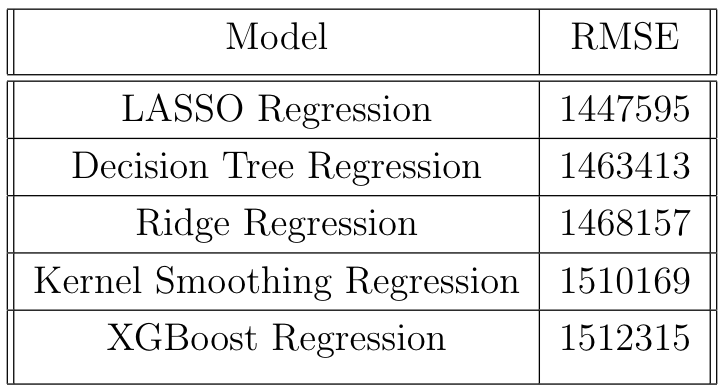

After testing multiple statistical learning models, the best model as judged by RMSE is LASSO regression, with a lambda value of 28392 giving an RMSE of 1447595.

<a id="20"></a> <br>
## Conclusion

This project provided us with great real world experience for creating and evaluating predictive models. The project introduced us to many of the common problems that are faced when working with imperfect data.

One concept explored in the lectures that commonly appeared in our project is model complexity. With such a large number of inputs, there was plenty of opportunity to overfit the models. Therefore, regularization was crucial for this specific problem. We needed to reduce the contribution of less important coefficients to simplify the models. With no regularization the complex models may have performed well in training but a complex model would never perform well in testing. In particular, it is well known that local methods are affected by a large number of inputs. This is called the curse of dimensionality, which was discussed in lecture. To overcome this problem, we decided to use an additive model with kernel smoothing after reducing the model to the five best inputs determined by the XGBoost model.

<a id="21"></a> <br>
### Future Applications

Handling missing data is a common problem in machine learning that can be solved using many different techniques. It would be interesting to test multiple methods and analyze which leads to the best performance. A second way that we would improve the final model is by tuning multiple hyperparameters. In the project we explored tuning the most important hyperparameter in the respective models. However, for XGBoost and decision tree models specifically, there are multiple other very important hyperparameters that could also be tuned. Using a common library in R, a user can provide a sequence of values for each hyperparameter used in the model and R will output the optimal model with the corresponding RMSE and it’s parameters. This method is computationally expensive, however it leads to a stronger predictive model. There are multiple methods that could have been explored beyond the models used in this project. It would have been interesting to explore other boosting techniques such as AdaBoost. If we had wanted to increase the number of inputs, we could have created interaction terms between existing inputs. However, increasing the number of inputs beyond the already large number currently in the model would also increase the amount of time required to train the models. If computing power and time was not important it would be interesting to see how the interaction terms would impact the model. Another method we could have used to increase the number of inputs is categorical encoding. It would have been valuable to encode string and categorical data to allow all inputs to be used in the model. Overall there are multiple future applications that could be explored to improve predictive power.

<a id="22"></a> <br>
## References

1. Hockey Abstract. (n.d.). Retrieved from http://www.hockeyabstract.com/
2. Yüzbaşı, B., Arashi, M., & Ahmed, S. E. (2020). Shrinkage Estimation Strategies in Generalised Ridge Regression Models: Low/High‐Dimension Regime. International Statistical Review, 88(1), 229–251. doi: 10.1111/insr.12351
3. Chen, M., Liu, Q., Chen, S., Liu, Y., Zhang, C.-H., & Liu, R. (2019). XGBoost-Based Algorithm Interpretation and Application on Post-Fault Transient Stability Status Prediction of Power System. IEEE Access, 7, 13149–13158. doi: 10.1109/access.2019.2893448